# ルジャンドル多項式と球面調和関数のpython可視化コード

## 必要なライブラリをインポート

In [32]:
from matplotlib.animation import FuncAnimation
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm
from scipy.special import legendre

以下は許可して実行してください

In [13]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## ルジャンドル多項式

Legendre polynomials visualization animation has been saved at /content/drive/MyDrive/legendre_polynomials_plot_animation.mp4 up to n=10


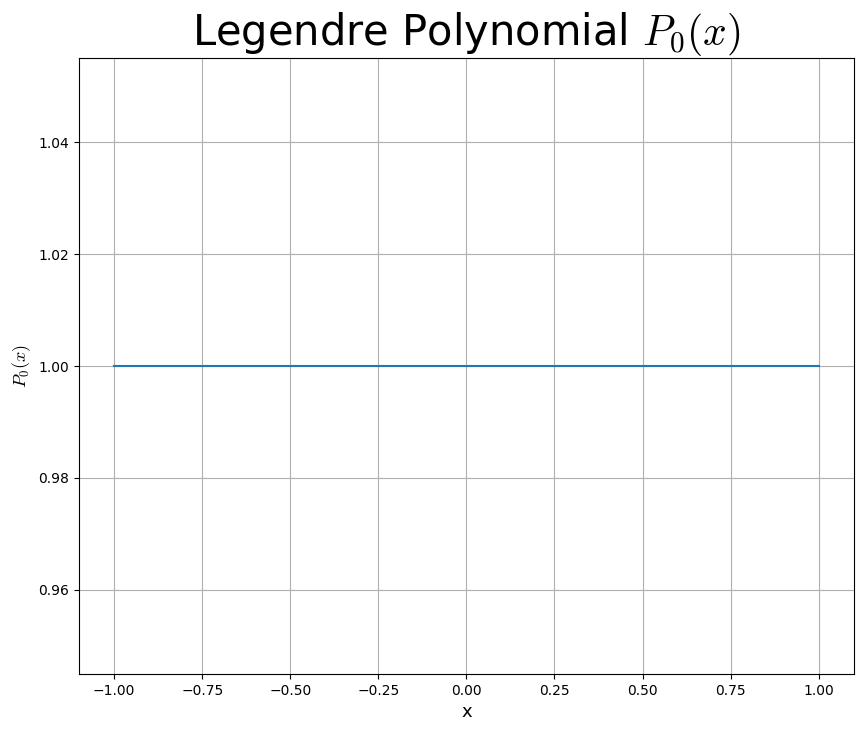

In [37]:
max_n = 10

fig, ax = plt.subplots(figsize=(10, 8))
plt.grid(True)
x = np.linspace(-1, 1, 400)

def update_single_plot(n):
    ax.clear()
    ax.grid(True)
    P_n = legendre(n)
    y = P_n(x)
    ax.plot(x, y)
    ax.set_title(f'Legendre Polynomial $P_{n}(x)$')
    ax.set_xlabel('x')
    ax.set_ylabel(f'$P_{n}(x)$')

ani_plot = FuncAnimation(fig, update_single_plot, frames=range(max_n), repeat=False)
ani_plot_save_path = '/content/drive/MyDrive/legendre_polynomials_plot_animation.mp4'
ani_plot.save(ani_plot_save_path, writer='ffmpeg', fps=1)

print(f'Legendre polynomials visualization animation has been saved at {ani_plot_save_path} up to n={max_n}')

このコードを実行すると$n=1, 2, \dots, 8$までのルジャンドル多項式をプロットしたアニメーションがgoogle driveに保存される

## 球面調和関数

ちょっと実行に時間かかります

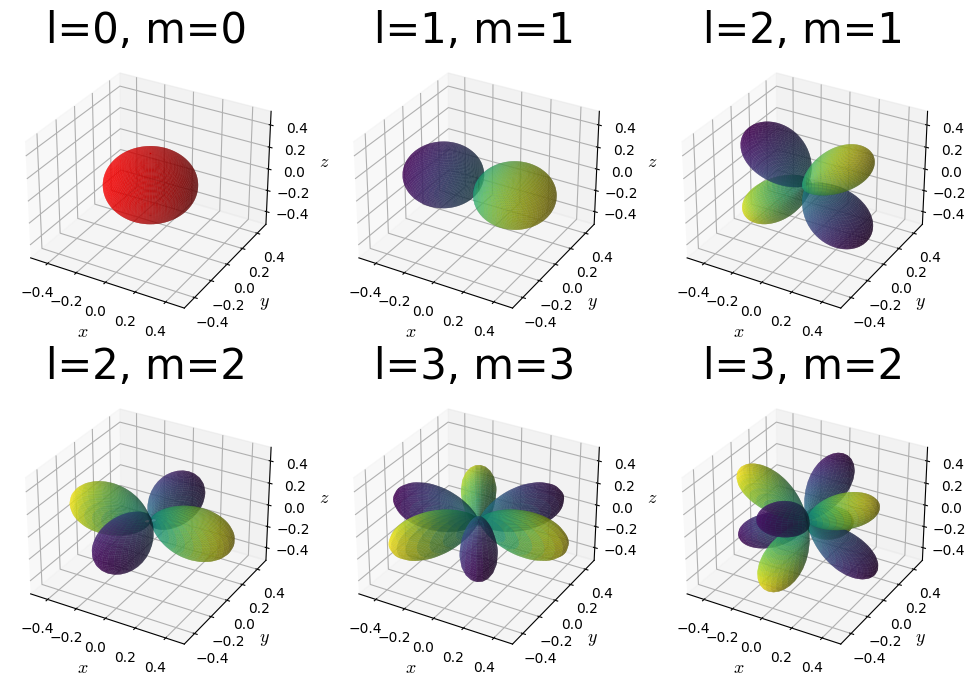

In [34]:
def real_sph_harm(l, m, theta, phi):
    if m < 0:
        Y = np.real(1.j * np.sqrt(1 / 2) * (sph_harm(m, l, phi, theta) + (-1) ** (-m + 1) * sph_harm(-m, l, phi, theta)))
    elif m == 0:
        Y = np.real(sph_harm(m, l, phi, theta))
    else:
        Y = np.real(np.sqrt(1 / 2) * (sph_harm(-m, l, phi, theta) + (-1) ** m * sph_harm(m, l, phi, theta)))

    return Y

def polar(r, theta, phi):
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return x, y, z

def visualization_sphere_harm(ax, l, m, ax_lim=0.5, rst=1, cst=1, N=101):
    theta_min = 0.0
    theta_max = np.pi
    phi_min = 0.0
    phi_max = 2.0 * np.pi

    theta_a = np.linspace(theta_min, theta_max, N)
    phi_a = np.linspace(phi_min, phi_max, N)
    theta, phi = np.meshgrid(theta_a, phi_a)

    Y_real = real_sph_harm(l, m, theta, phi)
    r_tilde = np.fabs(Y_real)
    x, y, z = polar(r_tilde, theta, phi)
    title_name = f"l={l}, m={m}"

    alpha = 0.7
    color = cm.viridis
    Max = np.maximum(np.fabs(np.amin(Y_real)), np.fabs(np.amax(Y_real)))
    norm = matplotlib.colors.Normalize(vmin=-Max, vmax=Max)

    if l == 0 and m == 0:
        ax.plot_surface(x, y, z, color="red", alpha=alpha, linewidth=0, rstride=rst, cstride=cst)
    else:
        ax.plot_surface(x, y, z, facecolors=color(norm(Y_real)), alpha=alpha, linewidth=0, rstride=rst, cstride=cst)

    ax.set_xlim(-ax_lim, ax_lim)
    ax.set_ylim(-ax_lim, ax_lim)
    ax.set_zlim(-ax_lim, ax_lim)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.set_title(title_name)

fig = plt.figure(figsize=(12, 8))
for i, (l, m) in enumerate(zip([0, 1, 2, 2, 3, 3], [0, 1, 1, 2, 3, 2])):
    ax = fig.add_subplot(2, 3, i + 1, projection='3d')
    visualization_sphere_harm(ax, l, m)

plt.savefig("/content/drive/MyDrive/sphere_harm_plot.png", format="png", dpi=300)
plt.show()

同様にこの行動を実行すると球面調和関数のプロットがgoogle driveに保存されます